# Assignment 2

Part 1 

In [2]:
import pandas as pd #importing the library pandas to be able to analyze the data
df=pd.read_csv('results.csv') #importing the data into python

In [3]:
df.head() #viewing the first 5 rows of the data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
x=df['home_score']-df['away_score'] #the variable x is the diffrence between the home score and away score

In [5]:
x[0:5] 

0    0
1    2
2    1
3    0
4    3
dtype: int64

In [6]:
import numpy as np
conditions=[(x<0),(x>0),(x==0)]
values=['lose','win','draw']

In [7]:
df['results_home']=np.select(conditions,values)

In [8]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win


In [9]:
df['results_home'].value_counts()

win     21009
lose    12224
draw     9955
Name: results_home, dtype: int64

In [10]:
df['results_home'].value_counts(normalize=True)

win     0.486455
lose    0.283042
draw    0.230504
Name: results_home, dtype: float64

In [11]:
x=df['results_home'].value_counts()

In [12]:
x=np.array(x)
x

array([21009, 12224,  9955], dtype=int64)

In [13]:
x.sum()

43188

In [14]:
df_noneutral=df[df['neutral']==False]
df_noneutral.shape


(32481, 10)

In [15]:
df_noneutralbraz=df_noneutral[df_noneutral['country']=='Brazil'] #probability that Brazil wins in it land
df_noneutralbraz

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results_home
503,5/11/1919,Brazil,Chile,6,0,Copa América,Rio de Janeiro,Brazil,False,win
508,5/18/1919,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False,win
512,5/26/1919,Brazil,Uruguay,2,2,Copa América,Rio de Janeiro,Brazil,False,draw
513,5/29/1919,Brazil,Uruguay,1,0,Copa América,Rio de Janeiro,Brazil,False,win
515,6/1/1919,Brazil,Argentina,3,3,Friendly,Rio de Janeiro,Brazil,False,draw
...,...,...,...,...,...,...,...,...,...,...
42513,7/5/2021,Brazil,Peru,1,0,Copa América,Rio de Janeiro,Brazil,False,win
42529,7/10/2021,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False,lose
42756,9/9/2021,Brazil,Peru,2,0,FIFA World Cup qualification,Recife,Brazil,False,win
42916,10/14/2021,Brazil,Uruguay,4,1,FIFA World Cup qualification,Manaus,Brazil,False,win


In [16]:
df_noneutralbrazFriendly=df_noneutralbraz[df_noneutralbraz['tournament']=='Friendly']
df_noneutralbrazFriendly #probability of Brazil Winning in their land in friendly tournament

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results_home
515,6/1/1919,Brazil,Argentina,3,3,Friendly,Rio de Janeiro,Brazil,False,draw
681,10/29/1922,Brazil,Paraguay,3,1,Friendly,São Paulo,Brazil,False,win
1334,8/1/1930,Brazil,France,3,2,Friendly,Rio de Janeiro,Brazil,False,win
1338,8/10/1930,Brazil,Yugoslavia,4,1,Friendly,Rio de Janeiro,Brazil,False,win
1341,8/17/1930,Brazil,United States,4,3,Friendly,Rio de Janeiro,Brazil,False,win
...,...,...,...,...,...,...,...,...,...,...
37054,6/7/2015,Brazil,Mexico,2,0,Friendly,São Paulo,Brazil,False,win
37074,6/10/2015,Brazil,Honduras,1,0,Friendly,Porto Alegre,Brazil,False,win
38756,1/26/2017,Brazil,Colombia,1,0,Friendly,Rio de Janeiro,Brazil,False,win
40804,6/5/2019,Brazil,Qatar,2,0,Friendly,Brasília,Brazil,False,win


In [17]:
x=df_noneutralbrazFriendly['results_home'].value_counts(normalize=True)
x

win     0.754011
draw    0.192513
lose    0.053476
Name: results_home, dtype: float64

In [18]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
x=df_noneutralbrazFriendly['results_home'].value_counts()
x=np.array(x)
x


array([141,  36,  10], dtype=int64)

In [20]:
N=x.sum()
CI_braz=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_braz


(0.6922838397217296, 0.815737550652602)

### This means there is a 95% probability that Brazil winning in a friendly tournament will fall between the upper and lower bound of this interval.

In [21]:
df_noneutralgre=df_noneutral[df_noneutral['country']=='Greece']

In [25]:
df_noneutralgreFriendly=df_noneutralgre[df_noneutralgre['tournament']=='Friendly']

In [26]:
df_noneutralgreFriendly.shape


(126, 10)

In [28]:
df_noneutralgreFriendly['results_home'].value_counts(normalize=True)
x=df_noneutralgreFriendly['results_home'].value_counts()
x=np.array(x)
N=x.sum()
CI_greece=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_greece


(0.3114005769651982, 0.4822502166855954)

### There is a 95% probability of Greece winning in a friendly tournament will fall between the upper and lower bound of this interval.

In [32]:
df_noneutralegy=df_noneutral[df_noneutral['country']=='Egypt']
df_noneutralegyFriendly=df_noneutralegy[df_noneutralegy['tournament']=='Friendly']
df_noneutralegyFriendly['results_home'].value_counts(normalize=True)


win     0.551724
lose    0.241379
draw    0.206897
Name: results_home, dtype: float64

In [33]:
x=df_noneutralegyFriendly['results_home'].value_counts()
x=np.array(x)
N=x.sum()
CI_egy=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_egy


(0.47077769679111225, 0.6326705790709567)

In [35]:
ci_friendly = {}
ci_friendly['country'] = ['Brazil','Greece','Egypt']
ci_friendly['lb'] = [CI_braz[0],CI_greece[0],CI_egy[0]]
ci_friendly['ub'] = [CI_braz[1],CI_greece[1],CI_egy[1]]
df_ci= pd.DataFrame(ci_friendly)
df_ci


,country,lb,ub
0,Brazil,0.692284,0.815738
1,Greece,0.311401,0.482250
2,Egypt,0.470778,0.632671


In [45]:
from scipy.stats import norm,t
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype


([<matplotlib.axis.YTick at 0x19642985340>,
 [Text(0, 0, 'Brazil'), Text(0, 1, 'Greece'), Text(0, 2, 'Egypt')])

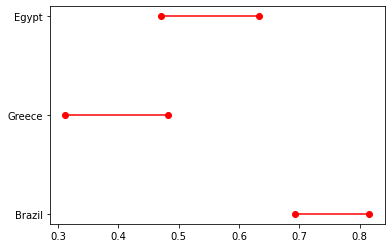

In [38]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['country']))

###### we can compute from this data that Brazil has the highest chance of winning a friendly match in their home land.This might be because of the extraordinary vibes of the fans cheering when they are playing in their own country.

In [22]:
l=list(df['tournament'].value_counts().index)
l

['Friendly',
 'FIFA World Cup qualification',
 'UEFA Euro qualification',
 'African Cup of Nations qualification',
 'FIFA World Cup',
 'Copa América',
 'African Cup of Nations',
 'AFC Asian Cup qualification',
 'CECAFA Cup',
 'CFU Caribbean Cup qualification',
 'Merdeka Tournament',
 'British Championship',
 'Gulf Cup',
 'AFC Asian Cup',
 'Gold Cup',
 'Island Games',
 'UEFA Euro',
 'COSAFA Cup',
 'UEFA Nations League',
 'AFF Championship',
 'Nordic Championship',
 'African Nations Championship',
 'CFU Caribbean Cup',
 'Amílcar Cabral Cup',
 "King's Cup",
 'South Pacific Games',
 'UNCAF Cup',
 'Korea Cup',
 'SAFF Cup',
 'Arab Cup',
 'Confederations Cup',
 'International Cup',
 'CCCF Championship',
 'EAFF Championship',
 'CONCACAF Nations League',
 'Windward Islands Tournament',
 'CONIFA World Football Cup',
 'Oceania Nations Cup',
 'AFC Challenge Cup',
 'WAFF Championship',
 'Baltic Cup',
 'AFC Challenge Cup qualification',
 'Nehru Cup',
 'Balkan Cup',
 'Indonesia Tournament',
 'Oceania

In [31]:
x=df['home_score']-df['away_score']
conditions=[(x<0),(x>0), (x==0)]
values=['win','lose','draw']
df['results_away']=np.select(conditions,values)
df


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results_home,results_away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win,lose
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,lose,win
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw,draw
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,draw,draw


In [33]:
df_noneutral=df[df['neutral']==False]

In [37]:
df_noneutralbrazil=df_noneutral[df_noneutral['away_team']=='Brazil']
df_noneutralbrazilFriendly=df_noneutralbrazil[df_noneutralbrazil['tournament']=='Friendly']
x=df_noneutralbrazilFriendly['results_away'].value_counts()
x=np.array(x)
x


array([98, 37, 37], dtype=int64)

In [38]:
N=x.sum()
CI_brazilFriendly=proportion_confint(count=x[2], nobs=N, alpha=(1-.95))
CI_brazilFriendly


(0.1537085316208902, 0.27652402651864466)

### There is a 95% probability that Brazil losing in a friendly match as the away team falls between the upper and lower bound of this interval.

In [40]:
df_noneutralbrazil=df_noneutral[df_noneutral['away_team']=='Brazil']
df_noneutralbrazilFriendly=df_noneutralbrazil[df_noneutralbrazil['tournament']=='FIFA World Cup qualification']
x=df_noneutralbrazilFriendly['results_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_brazilFIFA=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_brazilFIFA


(0.35008783332691606, 0.6007318388042314)

### There is a 95% probability that Brazil losing in the Fifa world cup qualifications as the away team falls between the upper and lower bound of this interval.

In [41]:
df_noneutralbrazil=df_noneutral[df_noneutral['away_team']=='Brazil']
df_noneutralbrazilCA=df_noneutralbrazil[df_noneutralbrazil['tournament']=='Copa América']
x=df_noneutralbrazilCA['results_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_brazilCA=proportion_confint(count=x[2], nobs=N, alpha=(1-.95))
CI_brazilCA

(0.0786225906928602, 0.37299031253294623)

### This means that there is a 95% probability that Brazil losing as the away team in Coupa America falls between the upper and lower bounds of this interval.

In [43]:
ci_tour = {}
ci_tour['tournament'] = ['Friendly','FIFA World Cup qualification','Copa América']
ci_tour['lb'] = [CI_brazilFriendly[0],CI_brazilFIFA[0],CI_brazilCA[0]]
ci_tour['ub'] = [CI_brazilFriendly[1],CI_brazilFIFA[1],CI_brazilCA[1]]
df_ci= pd.DataFrame(ci_tour)
df_ci

,tournament,lb,ub
0,Friendly,0.153709,0.276524
1,FIFA World Cup qualification,0.350088,0.600732
2,Copa América,0.078623,0.372990


([<matplotlib.axis.YTick at 0x152d4cab0d0>,
 [Text(0, 0, 'Friendly'),
  Text(0, 1, 'FIFA World Cup qualification'),
  Text(0, 2, 'Copa América')])

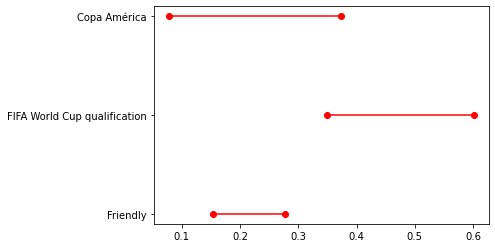

In [46]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['tournament']))


### This means that Brazil has the highest chance of losing in The FIFA World cup. This might be because they face very strong oponents and winning is harder than in Friendly or Copa America.

## Part 2

In this part, I am going to analyze the daily reported number of covid cases and deaths.

In [4]:
import pandas as pd
dy=pd.read_csv('coviddata.csv',encoding='latin-1')

In [5]:
dy.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2/24/2020,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2/25/2020,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2/26/2020,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2/27/2020,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2/28/2020,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [6]:
dy['country'].unique() #returns numoy array of unique values in that column

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua & Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia & Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Côte d\x92Ivoire', 'Cameroon',
       'Congo - Kinshasa', 'Congo - Brazzaville', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', '

In [7]:
from pandas.api.types import CategoricalDtype

In [8]:
cats=['Fri','Sat','Sun','Mon','Tue','Wed','Thu']
cat_type=CategoricalDtype(categories=cats,ordered=True)
dy['weekdays']=dy['weekdays'].astype(cat_type)

In [9]:
cats=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type=CategoricalDtype(categories=cats,ordered=True)

In [10]:
dy['month']=dy['month'].astype(cat_type)

In [11]:
dyegy=dy[dy['country']=='Egypt']
import numpy as np

In [12]:
stats=dyegy.groupby("weekdays").agg({"dcases":[np.mean,np.std,np.size]})

In [13]:
stats=pd.DataFrame(stats)
stats.shape

(7, 3)

In [14]:
stats

dcases                 
                mean         std size
weekdays                             
Fri       567.161616  428.533849   99
Sat       558.806122  421.803605   98
Sun       545.520408  422.358748   98
Mon       561.846939  442.137949   98
Tue       566.153061  419.125460   98
Wed       561.479592  406.337812   98
Thu       567.683673  410.020004   98

In [15]:
stats.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [16]:
stats.columns=['mean','std','size']
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [17]:
import scipy
import scipy.stats
from scipy.stats import norm,t
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt


In [18]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [19]:
x=dyegy['dcases']

In [20]:
get_ci_lb(x)

529.7945911276133

In [21]:
def get_ci_ub(x,alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error=t.ppf(1-alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [22]:
get_ci_ub(x)

592.694491841819

In [23]:
ci_dcases=statsm=dyegy.groupby("weekdays").agg({"dcases":[np.mean,np.std,np.size,get_ci_lb,get_ci_ub]})
statsm


dcases                                         
                mean         std size   get_ci_lb   get_ci_ub
weekdays                                                     
Fri       567.161616  428.533849   99  481.692047  652.631185
Sat       558.806122  421.803605   98  474.239849  643.372396
Sun       545.520408  422.358748   98  460.842836  630.197981
Mon       561.846939  442.137949   98  473.203887  650.489990
Tue       566.153061  419.125460   98  482.123722  650.182401
Wed       561.479592  406.337812   98  480.014014  642.945170
Thu       567.683673  410.020004   98  485.479863  649.887484

In [24]:
statsm.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [25]:
statsm.columns=['mean','std','size','lb','ub']
statsm['weekdays']=statsm.index
statsm

,mean,std,size,lb,ub,weekdays
weekdays,,,,,,
Fri,567.161616,428.533849,99,481.692047,652.631185,Fri
Sat,558.806122,421.803605,98,474.239849,643.372396,Sat
Sun,545.520408,422.358748,98,460.842836,630.197981,Sun
Mon,561.846939,442.137949,98,473.203887,650.489990,Mon
Tue,566.153061,419.125460,98,482.123722,650.182401,Tue
Wed,561.479592,406.337812,98,480.014014,642.945170,Wed
Thu,567.683673,410.020004,98,485.479863,649.887484,Thu


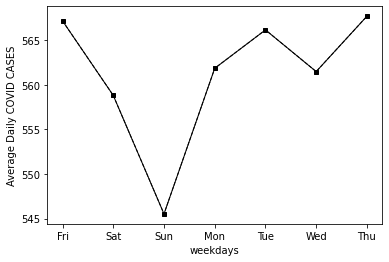

In [26]:
plt.plot( 'weekdays', 'mean', data=statsm, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsm, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("weekdays")
plt.ylabel("Average Daily COVID CASES")
plt.show()

Average covid cases were the highest on Thurdays and Fridays which makes sense since these are weekend days when people go out the most. Places are generally more crowded on Thursday and Friday so the average cases are greater.

In [27]:
dy['date'][0]

'2/24/2020'

In [28]:
dy['year'] = pd. DatetimeIndex(dy['date']). year

In [29]:
dy['year'][0]

2020

In [30]:
statsdcases=dy.groupby(['country','year','weekdays']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsdcases

dcases                                 \
                                 mean          std  size   get_ci_lb   
country     year weekdays                                              
Afghanistan 2020 Fri       194.590909   244.064166  44.0  120.388621   
                 Sat       154.068182   199.677228  44.0   93.360756   
                 Sun       168.386364   229.780402  44.0   98.526736   
                 Mon       146.266667   186.407350  45.0   90.263699   
                 Tue       154.888889   177.833837  45.0  101.461690   
...                               ...          ...   ...         ...   
Zimbabwe    2021 Sun       284.538462   467.821587  52.0  154.296100   
                 Mon       403.730769   732.665296  52.0  199.755448   
                 Tue       636.403846  1017.270305  52.0  353.193985   
                 Wed       725.826923  1548.422407  52.0  294.743373   
                 Thu       701.173077  1177.666598  52.0  373.308603   

                                        
                             get_ci_ub  
country     year weekdays               
Afghanistan 2020 Fri        268.793197  
                 Sat        214.775608  
                 Sun        238.245991  
                 Mon        202.269634  
                 Tue        208.316088  
...                                ...  
Zimbabwe    2021 Sun        414.780823  
                 Mon        607.706090  
                 Tue        919.613707  
                 Wed       1156.910474  
                 Thu       1029.037551  

[2618 rows x 5 columns]

In [31]:
statsdcases=statsdcases.reset_index()
statsdcases #tranferring the data index into columns

country  year weekdays      dcases                                 \
                                        mean          std  size   get_ci_lb   
0     Afghanistan  2020      Fri  194.590909   244.064166  44.0  120.388621   
1     Afghanistan  2020      Sat  154.068182   199.677228  44.0   93.360756   
2     Afghanistan  2020      Sun  168.386364   229.780402  44.0   98.526736   
3     Afghanistan  2020      Mon  146.266667   186.407350  45.0   90.263699   
4     Afghanistan  2020      Tue  154.888889   177.833837  45.0  101.461690   
...           ...   ...      ...         ...          ...   ...         ...   
2613     Zimbabwe  2021      Sun  284.538462   467.821587  52.0  154.296100   
2614     Zimbabwe  2021      Mon  403.730769   732.665296  52.0  199.755448   
2615     Zimbabwe  2021      Tue  636.403846  1017.270305  52.0  353.193985   
2616     Zimbabwe  2021      Wed  725.826923  1548.422407  52.0  294.743373   
2617     Zimbabwe  2021      Thu  701.173077  1177.666598  52.0  373.308603   

                   
        get_ci_ub  
0      268.793197  
1      214.775608  
2      238.245991  
3      202.269634  
4      208.316088  
...           ...  
2613   414.780823  
2614   607.706090  
2615   919.613707  
2616  1156.910474  
2617  1029.037551  

[2618 rows x 8 columns]

In [32]:
statsEgy=statsdcases[(statsdcases['country']=='Egypt') & (statsdcases['year']==2021)]
statsEgy #filtering the data concerning Egypt in 2021

country  year weekdays      dcases                                \
                                  mean         std  size   get_ci_lb   
721   Egypt  2021      Fri  681.188679  328.472810  53.0  590.650360   
722   Egypt  2021      Sat  681.019231  332.058434  52.0  588.573573   
723   Egypt  2021      Sun  659.038462  339.218303  52.0  564.599483   
724   Egypt  2021      Mon  681.942308  372.374333  52.0  578.272632   
725   Egypt  2021      Tue  688.538462  345.451081  52.0  592.364266   
726   Egypt  2021      Wed  677.692308  320.514693  52.0  588.460448   
727   Egypt  2021      Thu  677.346154  324.265921  52.0  587.069945   

                 
      get_ci_ub  
721  771.726999  
722  773.464889  
723  753.477440  
724  785.611984  
725  784.712657  
726  766.924168  
727  767.622363

In [33]:
statsEgy.columns

MultiIndex([( 'country',          ''),
            (    'year',          ''),
            ('weekdays',          ''),
            (  'dcases',      'mean'),
            (  'dcases',       'std'),
            (  'dcases',      'size'),
            (  'dcases', 'get_ci_lb'),
            (  'dcases', 'get_ci_ub')],
           )

In [34]:
statsEgy.columns=['country','year','weekdays','mean','std','size','lb','ub']

The average daily covid cases by weekdays in Egypt.

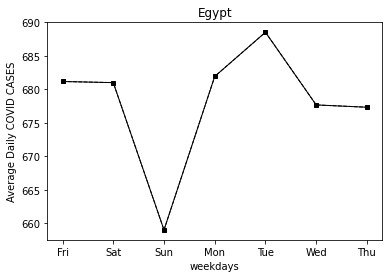

In [35]:
plt.plot( 'weekdays', 'mean', data=statsEgy, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsEgy, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("weekdays")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

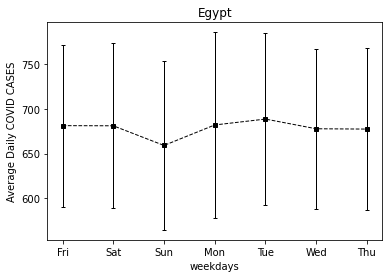

In [36]:
ci_lb_ub=[statsEgy['lb'],statsEgy['ub']]
err = np.abs(ci_lb_ub - statsEgy['mean'].to_numpy())
plt.errorbar('weekdays', 'mean',  yerr=err, data=statsEgy,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--')
plt.xlabel("weekdays")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

Comparing between 2020 and 2021

In [37]:
statsEgy21=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2021)]
statsEgy21

country  year weekdays      dcases                                \
                                  mean         std  size   get_ci_lb   
721   Egypt  2021      Fri  681.188679  328.472810  53.0  590.650360   
722   Egypt  2021      Sat  681.019231  332.058434  52.0  588.573573   
723   Egypt  2021      Sun  659.038462  339.218303  52.0  564.599483   
724   Egypt  2021      Mon  681.942308  372.374333  52.0  578.272632   
725   Egypt  2021      Tue  688.538462  345.451081  52.0  592.364266   
726   Egypt  2021      Wed  677.692308  320.514693  52.0  588.460448   
727   Egypt  2021      Thu  677.346154  324.265921  52.0  587.069945   

                 
      get_ci_ub  
721  771.726999  
722  773.464889  
723  753.477440  
724  785.611984  
725  784.712657  
726  766.924168  
727  767.622363

In [38]:
statsEgy20=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2020)]
statsEgy20

country  year weekdays      dcases                                \
                                  mean         std  size   get_ci_lb   
714   Egypt  2020      Fri  435.782609  492.233906  46.0  289.607182   
715   Egypt  2020      Sat  420.652174  470.933268  46.0  280.802256   
716   Egypt  2020      Sun  417.195652  471.579503  46.0  277.153827   
717   Egypt  2020      Mon  426.086957  478.249996  46.0  284.064239   
718   Egypt  2020      Tue  427.804348  454.462692  46.0  292.845587   
719   Egypt  2020      Wed  430.108696  454.125153  46.0  295.250172   
720   Egypt  2020      Thu  443.717391  462.180035  46.0  306.466863   

                 
      get_ci_ub  
714  581.958035  
715  560.502092  
716  557.237478  
717  568.109674  
718  562.763108  
719  564.967219  
720  580.967920

In [39]:
statsEgy20.columns=['country','year','weekdays','mean','std','size','lb','ub']
statsEgy21.columns=['country','year','weekdays','mean','std','size','lb','ub']
x=statsEgy20['weekdays']
x

714    Fri
715    Sat
716    Sun
717    Mon
718    Tue
719    Wed
720    Thu
Name: weekdays, dtype: category
Categories (7, object): ['Fri' < 'Sat' < 'Sun' < 'Mon' < 'Tue' < 'Wed' < 'Thu']

In [40]:
y1=statsEgy20['mean']
y1

714    435.782609
715    420.652174
716    417.195652
717    426.086957
718    427.804348
719    430.108696
720    443.717391
Name: mean, dtype: float64

In [41]:
y2=statsEgy21['mean']
y2

721    681.188679
722    681.019231
723    659.038462
724    681.942308
725    688.538462
726    677.692308
727    677.346154
Name: mean, dtype: float64

In [42]:
ci_lb_ub20=[statsEgy20['lb'],statsEgy20['ub']]
err20 = np.abs(ci_lb_ub20 - statsEgy20['mean'].to_numpy())

In [43]:
ci_lb_ub21=[statsEgy21['lb'],statsEgy21['ub']]
err21 = np.abs(ci_lb_ub21 - statsEgy21['mean'].to_numpy())

In [44]:
from matplotlib.transforms import Affine2D

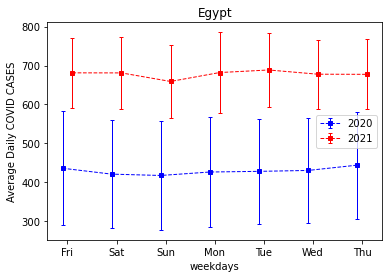

In [45]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('weekdays', 'mean',  yerr=err20, data=statsEgy20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('weekdays', 'mean',  yerr=err21, data=statsEgy21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("weekdays")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

Average cases in the year 2021 were generally higher than in 2020 since the virus got more spread and eassily transmitted.

In [46]:
 ratio=dy['ddeaths']/dy['dcases']
dy['fatality rate']=ratio
dy=dy.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
dy

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year,fatality rate
0,2/24/2020,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020,0.000000
12,3/7/2020,AFG,Afghanistan,Low income,South Asia,Asia,3,0,38041754,Sat,Mar,2020,0.000000
16,3/11/2020,AFG,Afghanistan,Low income,South Asia,Asia,3,0,38041754,Wed,Mar,2020,0.000000
19,3/14/2020,AFG,Afghanistan,Low income,South Asia,Asia,3,0,38041754,Sat,Mar,2020,0.000000
20,3/15/2020,AFG,Afghanistan,Low income,South Asia,Asia,6,0,38041754,Sun,Mar,2020,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122837,12/26/2021,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,605,6,14645468,Sun,Dec,2021,0.009917
122838,12/27/2021,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021,0.015483
122839,12/28/2021,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021,0.015245
122841,12/30/2021,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021,0.013636


### Fatality rate is the number of deaths divided by the number of cases. A high fatality rate mmans a large number of the people who got the virus died from it. A low fatlity rate means a low number of deaths from the people who got affected.

In [47]:
 cont=dy.groupby(['continent','year']).agg({"fatality rate": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
cont=cont.reset_index()
cont= pd.DataFrame(cont)
cont



continent  year fatality rate                             \
                                            mean       std   size get_ci_lb   
0                     Africa  2020      0.028318  0.097518  10557  0.026458   
1                     Africa  2021      0.033592  0.128916  13666  0.031430   
2                       Asia  2020      0.024008  0.091818  11902  0.022358   
3                       Asia  2021      0.024049  0.102663  15521  0.022434   
4                     Europe  2020      0.039555  0.127914  11960  0.037263   
5                     Europe  2021      0.027052  0.126590  14411  0.024985   
6   North America(continent)  2020      0.034215  0.099669   4412  0.031273   
7   North America(continent)  2021      0.029106  0.131691   5980  0.025767   
8                    Oceania  2020      0.034105  0.113399    652  0.025385   
9                    Oceania  2021      0.011527  0.069382   1081  0.007386   
10  South America(continent)  2020      0.043354  0.105435   3331  0.039772   
11  South America(continent)  2021      0.034072  0.102934   4124  0.030930   

              
   get_ci_ub  
0   0.030179  
1   0.035753  
2   0.025657  
3   0.025665  
4   0.041848  
5   0.029119  
6   0.037157  
7   0.032444  
8   0.042826  
9   0.015668  
10  0.046936  
11  0.037215

In [48]:
region=dy.groupby(['region','year']).agg({"fatality rate": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
region=region.reset_index()
region= pd.DataFrame(region)
region

region  year fatality rate                             \
                                              mean       std   size get_ci_lb   
0          East Asia & Pacific  2020      0.026686  0.098206   3971  0.023631   
1          East Asia & Pacific  2021      0.017356  0.071641   6133  0.015563   
2        Europe & Central Asia  2020      0.035287  0.117588  14216  0.033354   
3        Europe & Central Asia  2021      0.026095  0.120581  16996  0.024282   
4    Latin America & Caribbean  2020      0.038925  0.106369   7101  0.036450   
5    Latin America & Caribbean  2021      0.032524  0.125291   9374  0.029988   
6   Middle East & North Africa  2020      0.033866  0.115923   5820  0.030887   
7   Middle East & North Africa  2021      0.031742  0.103973   7181  0.029337   
8        North America(region)  2020      0.029540  0.030874    642  0.027147   
9        North America(region)  2021      0.013263  0.008370    730  0.012655   
10                  South Asia  2020      0.018443  0.037943   2115  0.016826   
11                  South Asia  2021      0.025788  0.135790   2732  0.020694   
12          Sub-Saharan Africa  2020      0.026405  0.099908   8949  0.024334   
13          Sub-Saharan Africa  2021      0.033196  0.137515  11637  0.030697   

              
   get_ci_ub  
0   0.029742  
1   0.019149  
2   0.037220  
3   0.027908  
4   0.041399  
5   0.035061  
6   0.036845  
7   0.034147  
8   0.031933  
9   0.013872  
10  0.020061  
11  0.030882  
12  0.028475  
13  0.035695

In [49]:
 income=dy.groupby(['income','year']).agg({"fatality rate": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
income=income.reset_index()
income= pd.DataFrame(income)
income

income  year fatality rate                             \
                                      mean       std   size get_ci_lb   
0          High income  2020      0.034568  0.124601  14860  0.032564   
1          High income  2021      0.015613  0.090810  18514  0.014305   
2           Low income  2020      0.038623  0.138915   5844  0.035061   
3           Low income  2021      0.043604  0.163124   7113  0.039813   
4  Lower middle income  2020      0.026722  0.084758   9373  0.025005   
5  Lower middle income  2021      0.031586  0.119050  12745  0.029518   
6  Upper middle income  2020      0.030269  0.077354  12737  0.028925   
7  Upper middle income  2021      0.033358  0.122827  16411  0.031479   

             
  get_ci_ub  
0  0.036572  
1  0.016921  
2  0.042185  
3  0.047396  
4  0.028438  
5  0.033653  
6  0.031612  
7  0.035238

In [50]:
income20=income[(income['year']==2020)]
income21=income[(income['year']==2021)]
income20.columns
income20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
income21.columns
income21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']


Text(0.5, 1.0, 'Income 2020')

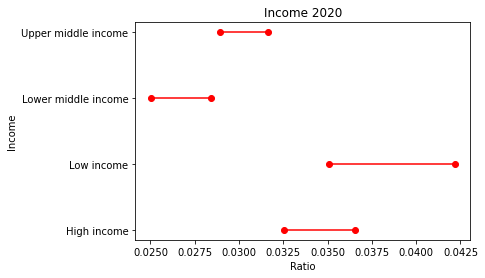

In [51]:
 import matplotlib.pyplot as plt
for lb,ub,y in zip(income20['get_ci_lb'],income20['get_ci_ub'],range(len(income20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(income20)),list(income20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income 2020")

### High income people have the lowest fatality rate meaning they have the smallest number of deaths compared to the number of cases.This may beacuase they have access to the best healthcare so they are able to better treat themselves when they have covid. Alternatively, people with low income have the highest death rate(fatality rate) compared to the cases affected since they have no access to healthcare.

Text(0.5, 1.0, 'Income 2021')

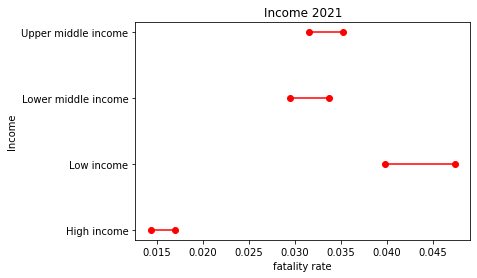

In [52]:
 import matplotlib.pyplot as plt
for lb,ub,y in zip(income21['get_ci_lb'],income21['get_ci_ub'],range(len(income21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(income21)),list(income21['continent']))
plt.xlabel("fatality rate")
plt.ylabel("Income")
plt.title("Income 2021")


In [53]:
cont20=cont[(cont['year']==2020)]
cont21=cont[(cont['year']==2021)]
cont20.columns
cont20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
cont21.columns
cont21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Continents 2021')

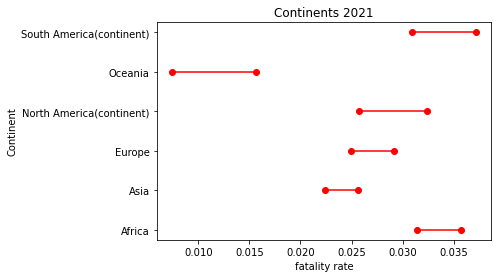

In [54]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(cont21['get_ci_lb'],cont21['get_ci_ub'],range(len(cont))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(cont21)),list(cont21['continent']))
plt.xlabel("fatality rate")
plt.ylabel("Continent")
plt.title("Continents 2021")



Text(0.5, 1.0, 'Continents 2020')

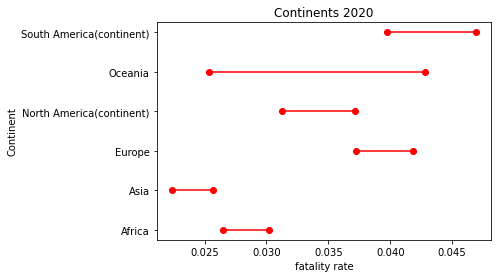

In [55]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(cont20['get_ci_lb'],cont20['get_ci_ub'],range(len(cont))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(cont20)),list(cont20['continent']))
plt.xlabel("fatality rate")
plt.ylabel("Continent")
plt.title("Continents 2020")



In [56]:
region20=region[(region['year']==2020)]
region21=region[(region['year']==2021)]
region20.columns
region20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
region21.columns
region21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']


Text(0.5, 1.0, 'Regions 2020')

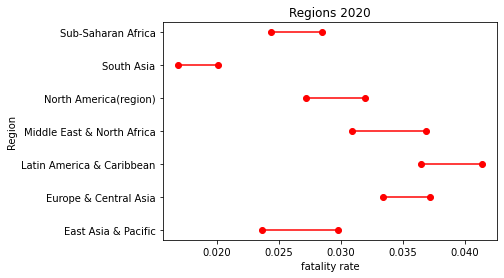

In [57]:
 import matplotlib.pyplot as plt
for lb,ub,y in zip(region20['get_ci_lb'],region20['get_ci_ub'],range(len(region20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(region20)),list(region20['continent']))
plt.xlabel("fatality rate")
plt.ylabel("Region")
plt.title("Regions 2020")

Text(0.5, 1.0, 'Regions 2021')

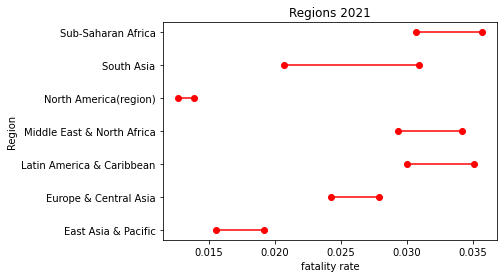

In [58]:
 import matplotlib.pyplot as plt
for lb,ub,y in zip(region21['get_ci_lb'],region21['get_ci_ub'],range(len(region21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(region21)),list(region21['continent']))
plt.xlabel("fatality rate")
plt.ylabel("Region")
plt.title("Regions 2021")


In [59]:
stats=dy.groupby("continent").agg({"ddeaths": [np.mean, np.std, np.size]})
stats
import numpy as np


In [60]:
stats

ddeaths                   
                                mean         std   size
continent                                              
Africa                      9.347769   36.504450  24223
Asia                       45.938336  204.005223  27423
Europe                     57.795533  146.199253  26371
North America(continent)  117.674846  406.957770  10392
Oceania                     2.073283    4.848733   1733
South America(continent)  155.452314  382.304438   7455

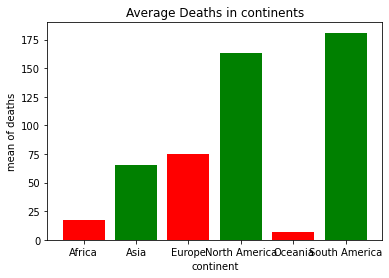

In [61]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5,6]
# heights of bars
height = [17, 65, 75, 163, 7,181]
 
# labels for bars
tick_label = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania','South America']
 
# plotting a bar chart
plt.bar(left,height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 

 
# naming the x-axis
plt.xlabel('continent')
# naming the y-axis
plt.ylabel('mean of deaths')
# plot title
plt.title('Average Deaths in continents')
 
# function to show the plot
plt.show()

Oceania and Africa have the lowest death rates from the covid 19 pandemic.At the start of the pandemic, it was feared that poorer countries, particularly in Africa, could be devastated by the virus due to poor hygiene and lower quality healthcare systems in most communities. But paradoxically, it is possible these challenging living conditions may have actually helped impoverished countries to better cope with the coronavirus.

In [62]:
dy.columns


Index(['date', 'iso3c', 'country', 'income', 'region', 'continent', 'dcases',
       'ddeaths', 'population', 'weekdays', 'month', 'year', 'fatality rate'],
      dtype='object')

In [63]:
dy['totcases'] = dy.groupby(['iso3c'])['dcases'].cumsum()

In [64]:
dy.loc[dy['iso3c']=='EGY'].head(6)

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year,fatality rate,totcases
34049,2/14/2020,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,1,0,100388073,Fri,Feb,2020,0.000000,1
34065,3/1/2020,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,1,0,100388073,Sun,Mar,2020,0.000000,2
34069,3/5/2020,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,1,0,100388073,Thu,Mar,2020,0.000000,3
34070,3/6/2020,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,12,0,100388073,Fri,Mar,2020,0.000000,15
34072,3/8/2020,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,34,1,100388073,Sun,Mar,2020,0.029412,49
34073,3/9/2020,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,6,0,100388073,Mon,Mar,2020,0.000000,55


In [65]:
dy['totdeaths'] = dy.groupby(['iso3c'])['ddeaths'].cumsum()
dy['totdeaths'].loc[dy['iso3c']=='EGY']

34049        0
34065        0
34069        0
34070        0
34072        1
         ...  
34731    21637
34732    21665
34733    21693
34734    21725
34735    21750
Name: totdeaths, Length: 664, dtype: int64

In [66]:
dy['cfr']=dy['totdeaths']/dy['totcases']


In [67]:
import matplotlib.pyplot as plt

In [68]:
dy_egy=dy.loc[dy['iso3c']=='EGY']

In [69]:
dy_egy['date']=pd.to_datetime(dy_egy['date'],format='%m-%d-%y')

ValueError: time data '2/14/2020' does not match format '%m-%d-%y' (match)

In [ ]:
plt.plot( 'date', 'cfr', data=dy_egy,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CFR")
plt.show()

#### fatality rate in Egypt was low at first then it increased drastically until reaching peak then it decreased agains steeply and finally it oncreased and stayed at an average probability.